<a href="https://colab.research.google.com/github/mzagari/ADS504_Team_8/blob/main/Saturday_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
__author__ = 'Martin Zagari, Summer Purschke, Dave Friesen'
__email__ = 'mzagari@sandiego.edu, spurschke@sandiego.edu, dfriesen@sandiego.edu'
__version__ = '1.0'
__date__ = 'August 2022'
__license__ = 'MIT'

In [282]:
# Basics
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# Modeling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Utilities
import joblib
import re
from time import time
import warnings
#warnings.filterwarnings('ignore')
#warnings.resetwarnings()

# Set basic options for consistent output
PRECISION = 2
np.set_printoptions(precision = PRECISION)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.precision', PRECISION)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Set Matplotlib defaults for consistent visualization look 'n' feel
FONTSIZE_S = 10
FONTSIZE_M = 12
FONTSIZE_L = 14
plt.style.use('default')
plt.rcParams['figure.titlesize'] = FONTSIZE_L
plt.rcParams['figure.figsize'] = (7, 7 / (16 / 9))
plt.rcParams['figure.subplot.left'] = '0.1'
plt.rcParams['figure.subplot.bottom'] = '0.1'
plt.rcParams['figure.subplot.top'] = '0.9'
plt.rcParams['figure.subplot.wspace'] = '0.4'
plt.rcParams['lines.linewidth'] = '2'
plt.rcParams['axes.linewidth'] = '2'
plt.rcParams['axes.titlesize'] = '8'
#plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = FONTSIZE_M
plt.rcParams['xtick.labelsize'] = FONTSIZE_S
plt.rcParams['ytick.labelsize'] = FONTSIZE_S
plt.rcParams['grid.linewidth'] = '1'
plt.rcParams['legend.fontsize'] = FONTSIZE_S
plt.rcParams['legend.title_fontsize'] = FONTSIZE_S

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RUN for Local File Retrieval

In [284]:
'''
# Set working directory (depending on coder)
#%cd '/Users/davidfriesen/Desktop/OneDrive/projects/ADS504_Team_8/data'

# Set row count control totals
structure_ctrl = sum(1 for line in open('csv_building_structure.csv'))
ownership_ctrl = sum(1 for line in open('csv_building_ownership_and_use.csv'))
damage_ctrl = sum(1 for line in open('csv_building_damage_assessment_featex.csv'))
'''

"\n# Set working directory (depending on coder)\n#%cd '/Users/davidfriesen/Desktop/OneDrive/projects/ADS504_Team_8/data'\n\n# Set row count control totals\nstructure_ctrl = sum(1 for line in open('csv_building_structure.csv'))\nownership_ctrl = sum(1 for line in open('csv_building_ownership_and_use.csv'))\ndamage_ctrl = sum(1 for line in open('csv_building_damage_assessment_featex.csv'))\n"

In [285]:
'''
# Read files, accomodating any 'bad' rows
structure_df = pd.read_csv('csv_building_structure.csv', on_bad_lines = 'skip', low_memory = False)
ownership_df = pd.read_csv('csv_building_ownership_and_use.csv', on_bad_lines = 'skip', low_memory = False)
damage_df = pd.read_csv('csv_building_damage_assessment_featex.csv', on_bad_lines = 'skip', low_memory = False)
'''

"\n# Read files, accomodating any 'bad' rows\nstructure_df = pd.read_csv('csv_building_structure.csv', on_bad_lines = 'skip', low_memory = False)\nownership_df = pd.read_csv('csv_building_ownership_and_use.csv', on_bad_lines = 'skip', low_memory = False)\ndamage_df = pd.read_csv('csv_building_damage_assessment_featex.csv', on_bad_lines = 'skip', low_memory = False)\n"

# Run for Google Drive/Colab/Cloud File Retrieval

In [286]:
# Set row count control totals
structure_ctrl = sum(1 for line in open('drive/MyDrive/ADS504/csv_building_structure.csv'))
ownership_ctrl = sum(1 for line in open('drive/MyDrive/ADS504/csv_building_ownership_and_use.csv'))
damage_ctrl = sum(1 for line in open('drive/MyDrive/ADS504/csv_building_damage_assessment_featex.csv'))

damage_df = pd.read_csv('drive/MyDrive/ADS504/csv_building_damage_assessment_featex.csv', on_bad_lines = 'skip', low_memory = False)
ownership_df = pd.read_csv('drive/MyDrive/ADS504/csv_building_ownership_and_use.csv', on_bad_lines = 'skip', low_memory = False)
structure_df = pd.read_csv('drive/MyDrive/ADS504/csv_building_structure.csv', on_bad_lines = 'skip', low_memory = False)

# Confirm load counts

In [287]:
# Confirm load counts
print('Structure: file=%0d, import=%0d, delta=%0d' %
      (structure_ctrl, len(structure_df), structure_ctrl - len(structure_df)))
print('Ownership: file=%0d, import=%0d, delta=%0d' %
      (ownership_ctrl, len(ownership_df), ownership_ctrl - len(ownership_df)))
print('Damage: file=%0d, import=%0d, delta=%0d' %
      (damage_ctrl, len(damage_df), damage_ctrl - len(damage_df)))

Structure: file=762106, import=762105, delta=1
Ownership: file=762106, import=762105, delta=1
Damage: file=762106, import=762105, delta=1


In [288]:
structure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762105 entries, 0 to 762104
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             762105 non-null  float64
 1   district_id                             762105 non-null  int64  
 2   vdcmun_id                               762105 non-null  int64  
 3   ward_id                                 762105 non-null  int64  
 4   count_floors_pre_eq                     762105 non-null  int64  
 5   count_floors_post_eq                    762105 non-null  int64  
 6   age_building                            762105 non-null  int64  
 7   plinth_area_sq_ft                       762105 non-null  int64  
 8   height_ft_pre_eq                        762105 non-null  int64  
 9   height_ft_post_eq                       762105 non-null  int64  
 10  land_surface_condition                  7621

In [289]:
ownership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762105 entries, 0 to 762104
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   building_id                    762105 non-null  float64
 1   district_id                    762105 non-null  int64  
 2   vdcmun_id                      762105 non-null  int64  
 3   ward_id                        762105 non-null  int64  
 4   legal_ownership_status         762105 non-null  object 
 5   count_families                 762103 non-null  float64
 6   has_secondary_use              762095 non-null  float64
 7   has_secondary_use_agriculture  762105 non-null  int64  
 8   has_secondary_use_hotel        762105 non-null  int64  
 9   has_secondary_use_rental       762105 non-null  int64  
 10  has_secondary_use_institution  762105 non-null  int64  
 11  has_secondary_use_school       762105 non-null  int64  
 12  has_secondary_use_industry    

In [290]:
damage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762105 entries, 0 to 762104
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   building_id                            762105 non-null  float64
 1   district_id                            762105 non-null  int64  
 2   vdcmun_id                              762105 non-null  int64  
 3   ward_id                                762105 non-null  int64  
 4   damage_overall_collapse                500743 non-null  object 
 5   damage_overall_leaning                 500742 non-null  object 
 6   area_assesed                           762093 non-null  object 
 7   damage_grade                           762093 non-null  object 
 8   technical_solution_proposed            762093 non-null  object 
 9   has_geotechnical_risk                  762093 non-null  float64
 10  has_geotechnical_risk_land_settlement  762105 non-null  

# Build the primary working df for processing: 'building_df'

In [291]:
from pandas.core.arrays import numeric
binary_class = True
trinary_class = False
quintary_class = False

# Eliminate features considered n/a to problem statement and hypothesis, or contaminated by post-earthquake data
structure_dr = structure_df.drop(columns = ['vdcmun_id', 'ward_id',
                                            'height_ft_post_eq', 'condition_post_eq', 'technical_solution_proposed'])

##################Drop Addl Cols with Post Earthquake Contamination
structure_dr = structure_dr.drop(columns = ['count_floors_post_eq'])
##################

ownership_dr = ownership_df.drop(columns = ['district_id', 'vdcmun_id', 'ward_id']
)
damage_dr = damage_df.drop(columns=['district_id', 'vdcmun_id', 'ward_id', 'damage_grade'])

##################Drop Addl Cols with Post Earthquake Contamination
damage_dr = damage_dr.drop(columns=['area_assesed','damage_overall_collapse','damage_overall_leaning','technical_solution_proposed'])
##################

#Convert damage_grade to a numeric variable and map to number of classes:

if binary_class is True:
  print("2")
  dict = {'Grade 1' : 0,
          'Grade 2' : 0,
          'Grade 3' : 0,
          'Grade 4' : 1,
          'Grade 5' : 1
          }

if trinary_class is True:
  print("3")
  dict = {'Grade 1' : 0,
          'Grade 2' : 0,
          'Grade 3' : 0,
          'Grade 4' : 1,
          'Grade 5' : 2
          }

if quintary_class is True:
  print("5")
  dict = {'Grade 1' : 1,
          'Grade 2' : 2,
          'Grade 3' : 3,
          'Grade 4' : 4,
          'Grade 5' : 5
          }
  
# Merge all three dataframes into common set of label and prospective features
temp_df = pd.merge(structure_dr, ownership_dr, how = 'inner', on = 'building_id')
building_df = pd.merge(temp_df, damage_dr, how = 'inner', on = 'building_id')
building_df.drop('building_id', axis = 1, inplace = True)
building_df.info()

# Remap the values of the dataframe
building_df = building_df.replace({'damage_grade': dict})
building_df['damage_grade'] = pd.to_numeric(building_df['damage_grade'])

2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 762104 entries, 0 to 762103
Data columns (total 45 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   district_id                             762104 non-null  int64  
 1   count_floors_pre_eq                     762104 non-null  int64  
 2   age_building                            762104 non-null  int64  
 3   plinth_area_sq_ft                       762104 non-null  int64  
 4   height_ft_pre_eq                        762104 non-null  int64  
 5   land_surface_condition                  762104 non-null  object 
 6   foundation_type                         762104 non-null  object 
 7   roof_type                               762104 non-null  object 
 8   ground_floor_type                       762104 non-null  object 
 9   other_floor_type                        762104 non-null  object 
 10  position                                76

In [292]:
#building_df10 = building_df.sample(frac=.1, random_state=42)
#sns.pairplot(building_df10, hue = "damage_grade", corner = True, diag_kind = 'hist')  # Based on looking at the data, plot feature separation

In [293]:
building_df['damage_grade'].value_counts()

1.00    459608
0.00    302484
Name: damage_grade, dtype: int64

In [294]:
# Identify prospective feature columns by 'type'
num_cols = [
    'count_floors_pre_eq',
    'age_building',
    'plinth_area_sq_ft',
    'height_ft_pre_eq',
    'count_families',
    'damage_grade'
    ]                       #6         
cat_cols = [
    'land_surface_condition',
    'foundation_type',
    'roof_type',
    'ground_floor_type',
    'other_floor_type',
    'position',
    'plan_configuration',
    'legal_ownership_status',
    'district_id'
    ]                           #9
bin_cols = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other',
    'has_secondary_use',
    'has_secondary_use_agriculture',
    'has_secondary_use_hotel',
    'has_secondary_use_rental',
    'has_secondary_use_institution',
    'has_secondary_use_school',
    'has_secondary_use_industry',
    'has_secondary_use_health_post',
    'has_secondary_use_gov_office',
    'has_secondary_use_use_police',
    'has_secondary_use_other',
    'has_geotechnical_risk',
    'has_geotechnical_risk_land_settlement',
    'has_geotechnical_risk_fault_crack',
    'has_geotechnical_risk_liquefaction',
    'has_geotechnical_risk_landslide',
    'has_geotechnical_risk_rock_fall',
    'has_geotechnical_risk_flood',
    'has_geotechnical_risk_other'
    ]                                   #30 (11, 11, 8 )

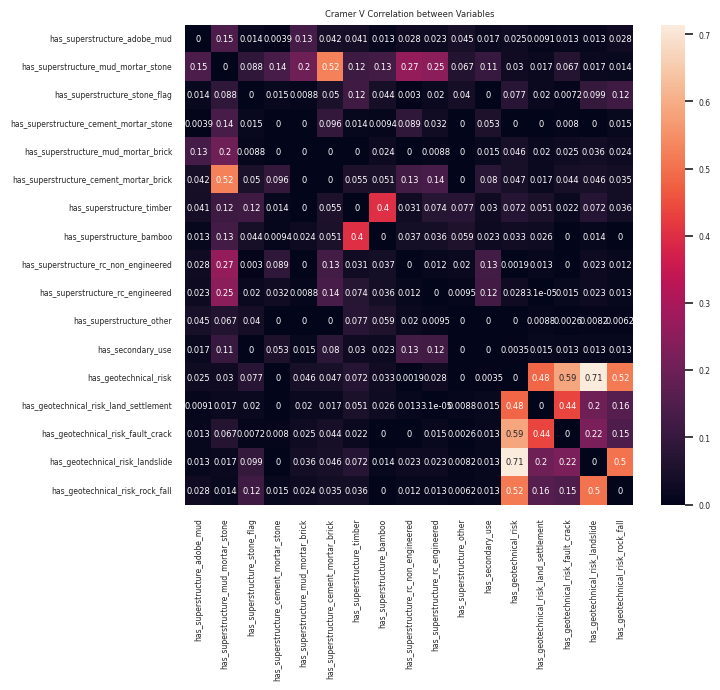

In [350]:
import itertools
import scipy.stats as ss
from scipy.stats import chi2_contingency
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = bin_cols
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(building_df[col1], building_df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

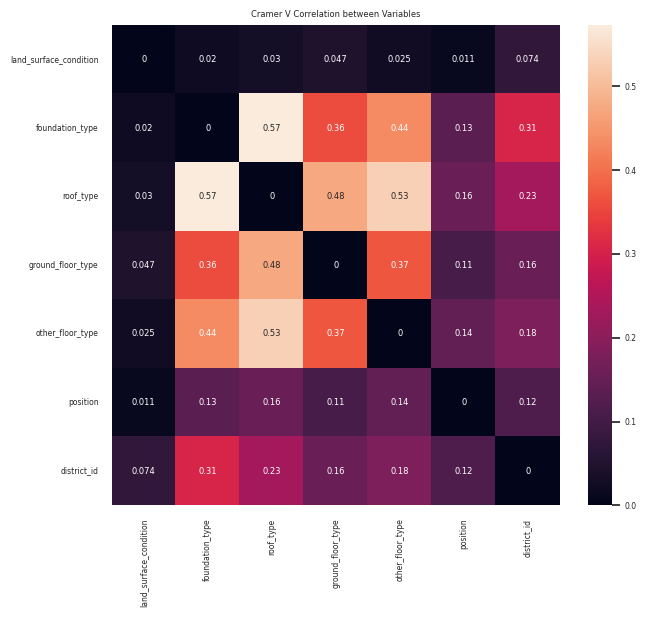

In [351]:
cols = cat_cols
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(building_df[col1], building_df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

#Numerical Features

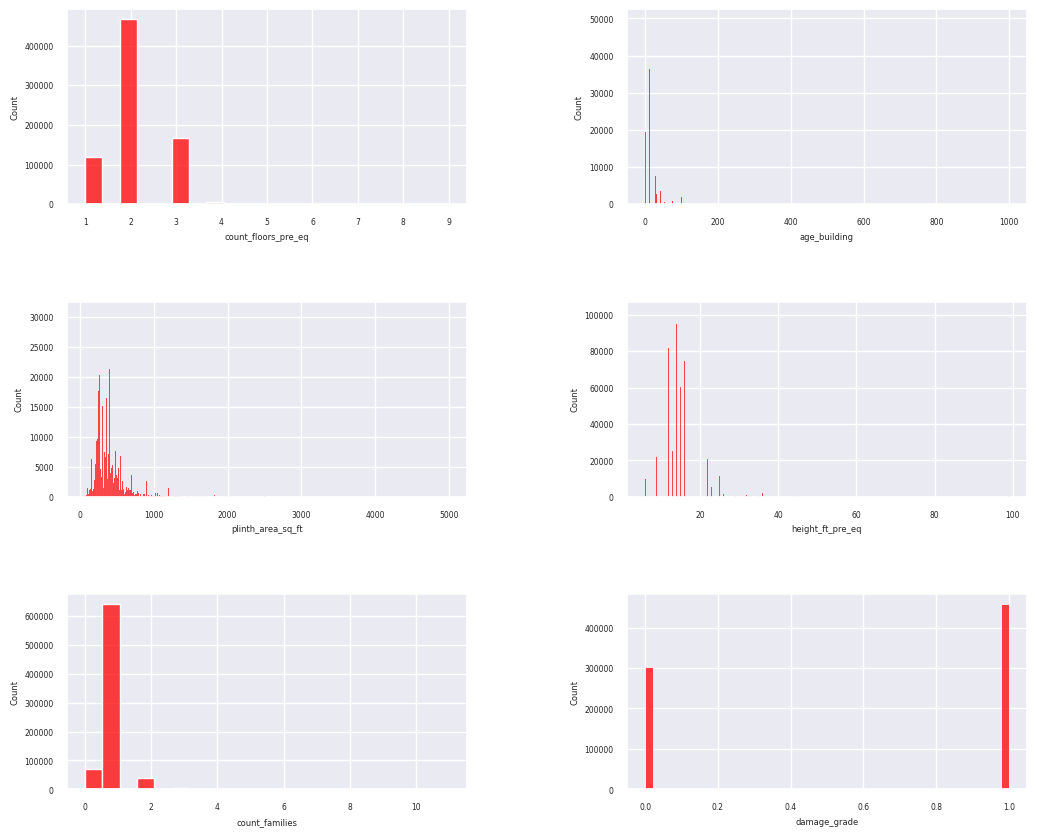

In [295]:
# Plot numeric histograms here

sns.set(font_scale=0.5)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, top = 0.75)

sns.histplot(building_df['count_floors_pre_eq'], color="red", ax=axs[0, 0])
sns.histplot(building_df['age_building'], color="red", ax=axs[0, 1])
sns.histplot(building_df['plinth_area_sq_ft'], color="red", ax=axs[1, 0])
sns.histplot(building_df['height_ft_pre_eq'], color="red", ax=axs[1, 1])
sns.histplot(building_df['count_families'], color="red", ax=axs[2, 0])
sns.histplot(building_df['damage_grade'], color="red", ax=axs[2, 1])

plt.show()

#Plot Outliers

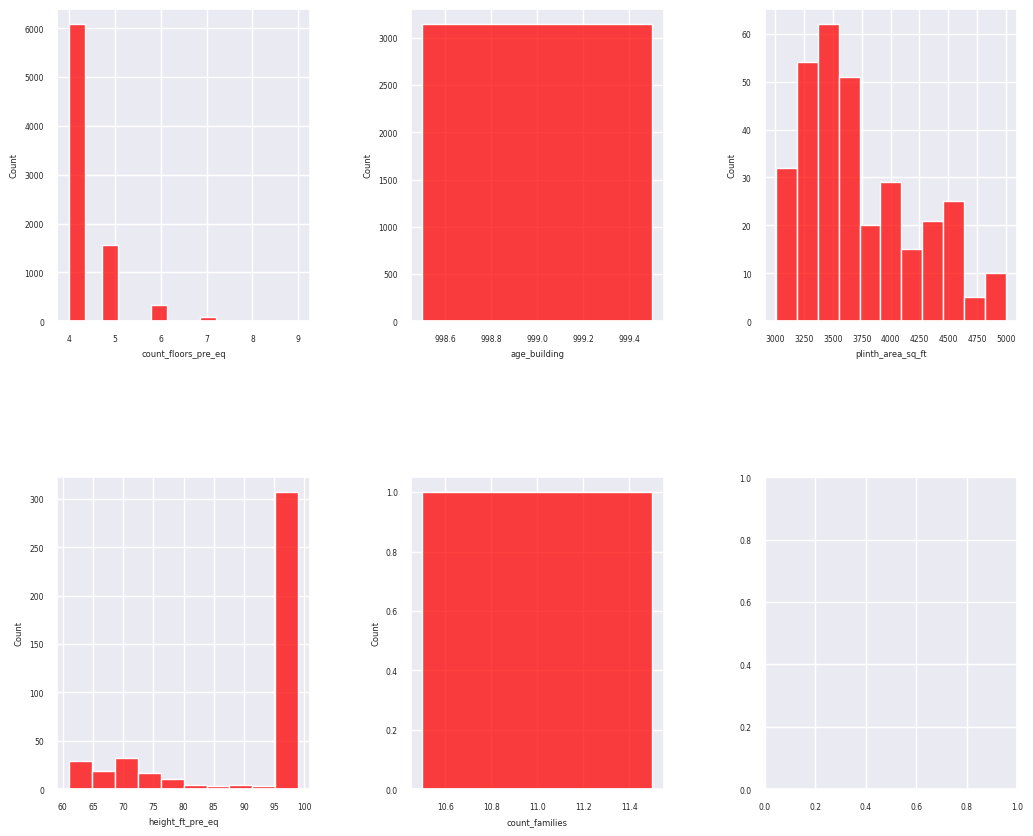

In [296]:
sns.set(font_scale=0.5)
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, top = 0.75)

outfloor=building_df[building_df['count_floors_pre_eq']>3]
sns.histplot(outfloor['count_floors_pre_eq'], color="red", ax=axs[0, 0])

outage=building_df[building_df['age_building']>200]
sns.histplot(outage['age_building'], color="red", ax=axs[0, 1])

outplinth=building_df[building_df['plinth_area_sq_ft']>3000]
sns.histplot(outplinth['plinth_area_sq_ft'], color="red", ax=axs[0, 2])

outheight=building_df[building_df['height_ft_pre_eq']>60]
sns.histplot(outheight['height_ft_pre_eq'], color="red", ax=axs[1, 0])

outfam=building_df[building_df['count_families']>10]
sns.histplot(outfam['count_families'], color="red", ax=axs[1, 1])

plt.show()

#Investigate Building with Age = 999

In [297]:
print(outage)

        district_id  count_floors_pre_eq  age_building  plinth_area_sq_ft  height_ft_pre_eq land_surface_condition     foundation_type             roof_type         ground_floor_type  other_floor_type   ... has_secondary_use_use_police has_secondary_use_other  has_geotechnical_risk  has_geotechnical_risk_land_settlement  has_geotechnical_risk_fault_crack  has_geotechnical_risk_liquefaction  has_geotechnical_risk_landslide  has_geotechnical_risk_rock_fall  has_geotechnical_risk_flood  has_geotechnical_risk_other
2004        12                2                999             225                25                 Flat                    Bamboo/Timber  Bamboo/Timber-Light roof         Mud        TImber/Bamboo-Mud  ...               0                          0                    0.00                             0                                    0                                   0                                 0                                0                              0         

In [298]:
corr_df = building_df[['age_building', 'damage_grade']].corr()
#corr_df.rename(columns = lambda s: s[0:19], index = lambda s: s[0:19], inplace = True)
print(corr_df)

              age_building  damage_grade
age_building      1.00          0.04    
damage_grade      0.04          1.00    


In [299]:
print(building_df.shape)
building_df.drop(building_df[building_df['age_building'] > 900].index, inplace = True)
building_df.shape

(762104, 45)


(758959, 45)

#Categorical Features

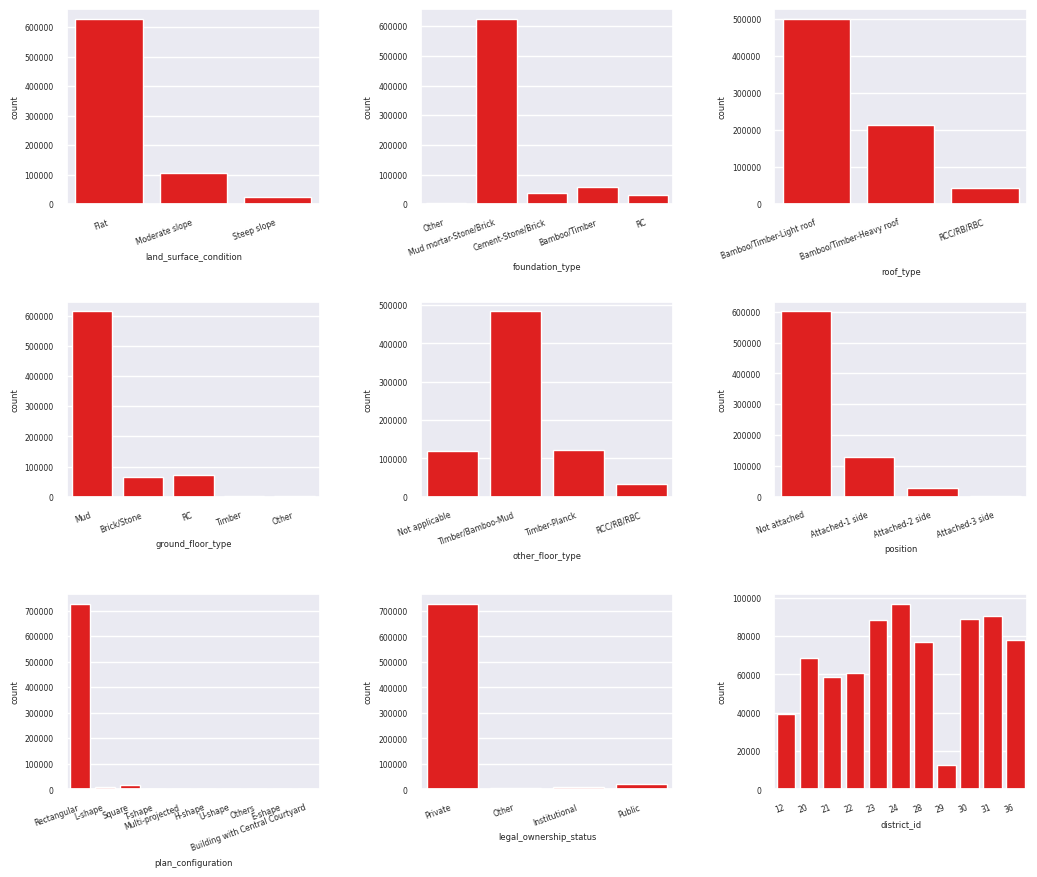

In [300]:
# Plot categorical histograms here

sns.set(font_scale=0.5)
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, top = 0.75)

chart = sns.countplot(x=building_df['land_surface_condition'], color="red", ax=axs[0, 0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['foundation_type'], color="red", ax=axs[0, 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['roof_type'], color="red", ax=axs[0, 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['ground_floor_type'], color="red", ax=axs[1, 0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['other_floor_type'], color="red", ax=axs[1, 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['position'], color="red", ax=axs[1, 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['plan_configuration'], color="red", ax=axs[2, 0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['legal_ownership_status'], color="red", ax=axs[2, 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
chart = sns.countplot(x=building_df['district_id'], color="red", ax=axs[2, 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')

plt.show()

#Binary Features (Superstructure)

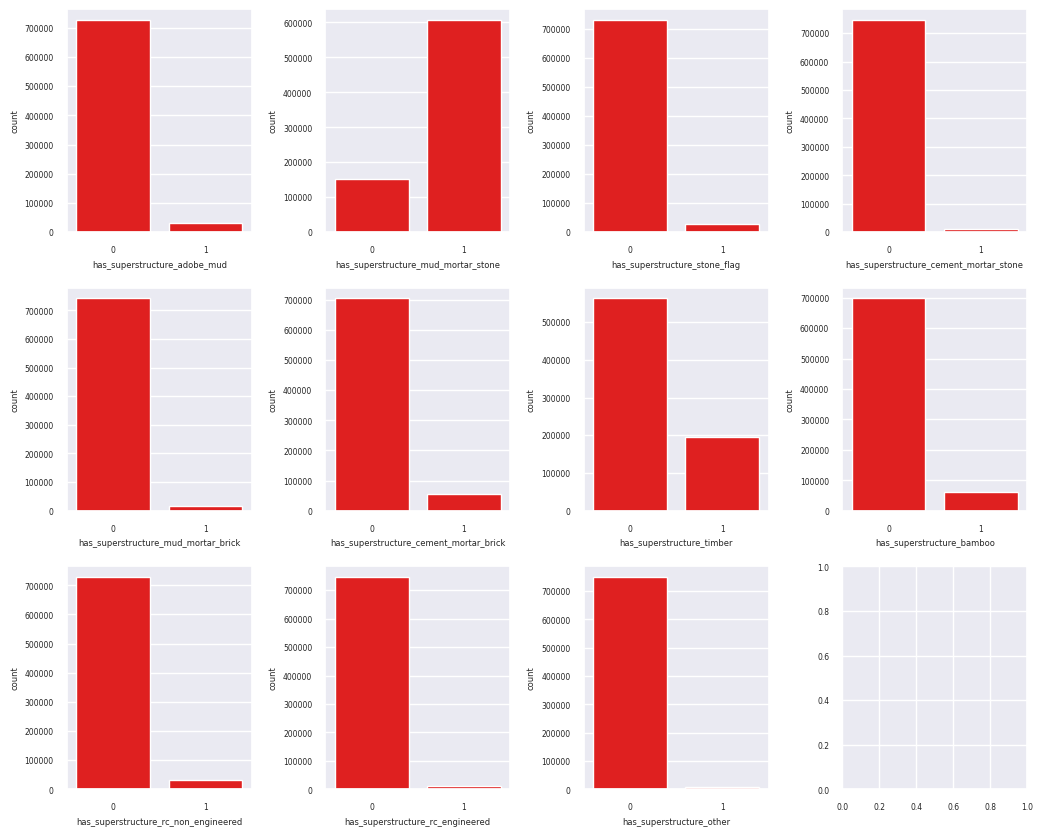

In [301]:
# Plot superstructure histograms here

sns.set(font_scale=0.5)
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
fig.subplots_adjust(hspace=0.25, top = 0.75)

chart = sns.countplot(x=building_df['has_superstructure_adobe_mud'], color="red", ax=axs[0, 0])
chart = sns.countplot(x=building_df['has_superstructure_mud_mortar_stone'], color="red", ax=axs[0, 1])
chart = sns.countplot(x=building_df['has_superstructure_stone_flag'], color="red", ax=axs[0, 2])
chart = sns.countplot(x=building_df['has_superstructure_cement_mortar_stone'], color="red", ax=axs[0, 3])

chart = sns.countplot(x=building_df['has_superstructure_mud_mortar_brick'], color="red", ax=axs[1, 0])
chart = sns.countplot(x=building_df['has_superstructure_cement_mortar_brick'], color="red", ax=axs[1, 1])
chart = sns.countplot(x=building_df['has_superstructure_timber'], color="red", ax=axs[1, 2])
chart = sns.countplot(x=building_df['has_superstructure_bamboo'], color="red", ax=axs[1, 3])

chart = sns.countplot(x=building_df['has_superstructure_rc_non_engineered'], color="red", ax=axs[2, 0])
chart = sns.countplot(x=building_df['has_superstructure_rc_engineered'], color="red", ax=axs[2, 1])
chart = sns.countplot(x=building_df['has_superstructure_other'], color="red", ax=axs[2, 2])

plt.show()

#Binary Features (Secondary Use)

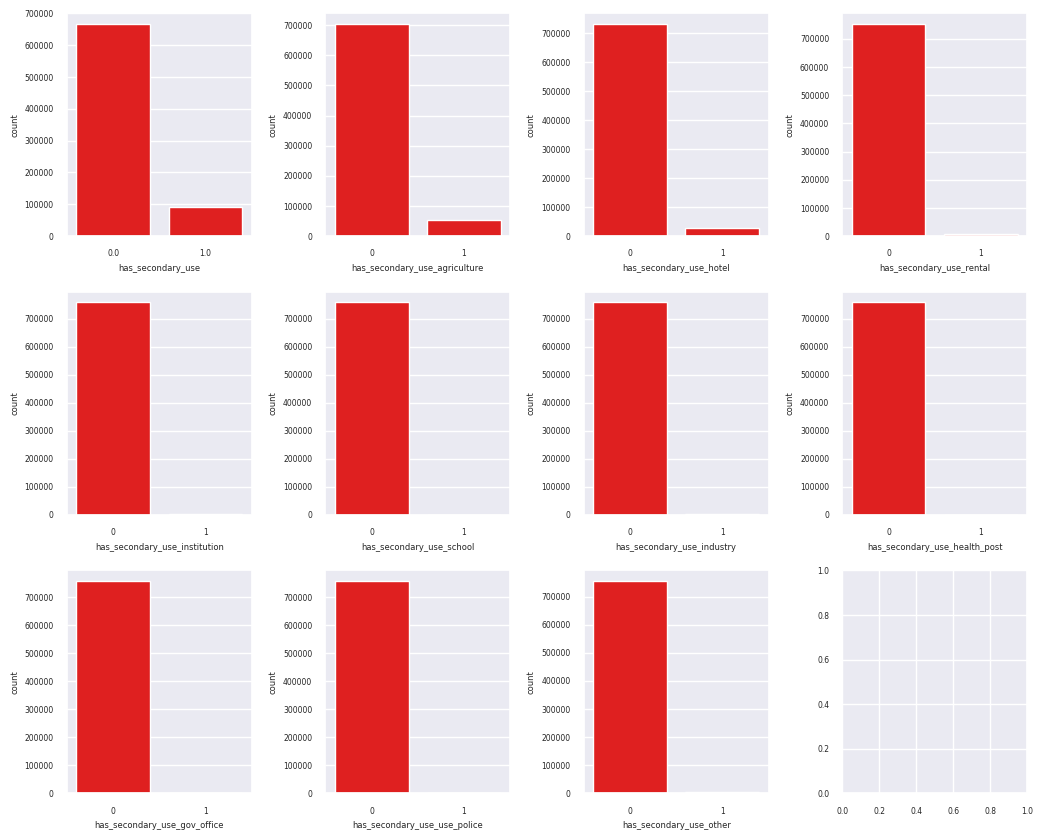

In [302]:
# Plot secondary use histograms here

sns.set(font_scale=0.5)
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
fig.subplots_adjust(hspace=0.25, top = 0.75)

chart = sns.countplot(x=building_df['has_secondary_use'], color="red", ax=axs[0, 0])
chart = sns.countplot(x=building_df['has_secondary_use_agriculture'], color="red", ax=axs[0, 1])
chart = sns.countplot(x=building_df['has_secondary_use_hotel'], color="red", ax=axs[0, 2])
chart = sns.countplot(x=building_df['has_secondary_use_rental'], color="red", ax=axs[0, 3])

chart = sns.countplot(x=building_df['has_secondary_use_institution'], color="red", ax=axs[1, 0])
chart = sns.countplot(x=building_df['has_secondary_use_school'], color="red", ax=axs[1, 1])
chart = sns.countplot(x=building_df['has_secondary_use_industry'], color="red", ax=axs[1, 2])
chart = sns.countplot(x=building_df['has_secondary_use_health_post'], color="red", ax=axs[1, 3])

chart = sns.countplot(x=building_df['has_secondary_use_gov_office'], color="red", ax=axs[2, 0])
chart = sns.countplot(x=building_df['has_secondary_use_use_police'], color="red", ax=axs[2, 1])
chart = sns.countplot(x=building_df['has_secondary_use_other'], color="red", ax=axs[2, 2])

plt.show()

#Binary Features (Geotechnical Risk)

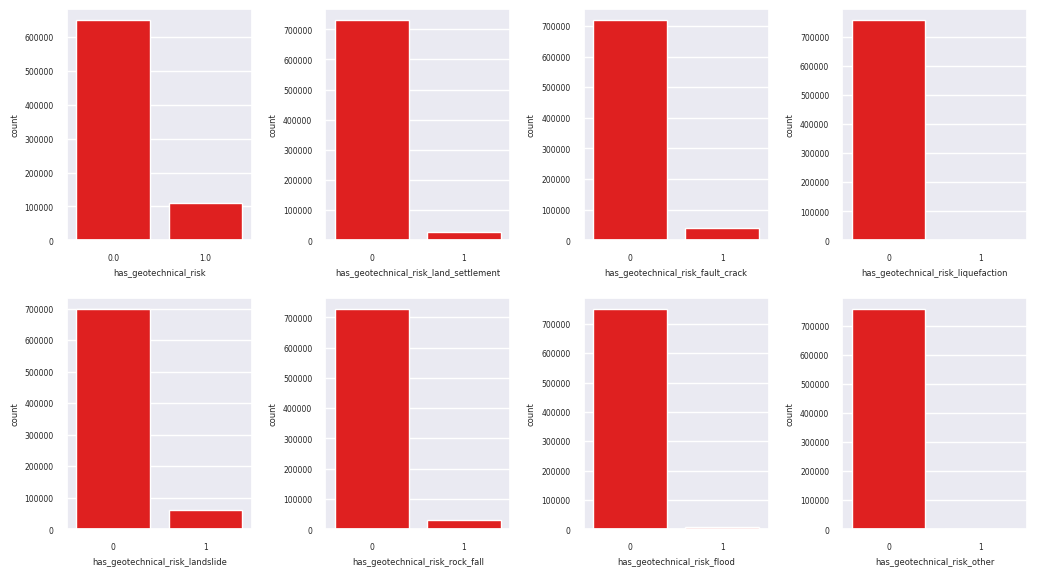

In [303]:
# Plot geotechnical risk histograms here

sns.set(font_scale=0.5)
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
fig.subplots_adjust(hspace=0.25, top = 0.75)

chart = sns.countplot(x=building_df['has_geotechnical_risk'], color="red", ax=axs[0, 0])
chart = sns.countplot(x=building_df['has_geotechnical_risk_land_settlement'], color="red", ax=axs[0, 1])
chart = sns.countplot(x=building_df['has_geotechnical_risk_fault_crack'], color="red", ax=axs[0, 2])
chart = sns.countplot(x=building_df['has_geotechnical_risk_liquefaction'], color="red", ax=axs[0, 3])

chart = sns.countplot(x=building_df['has_geotechnical_risk_landslide'], color="red", ax=axs[1, 0])
chart = sns.countplot(x=building_df['has_geotechnical_risk_rock_fall'], color="red", ax=axs[1, 1])
chart = sns.countplot(x=building_df['has_geotechnical_risk_flood'], color="red", ax=axs[1, 2])
chart = sns.countplot(x=building_df['has_geotechnical_risk_other'], color="red", ax=axs[1, 3])

plt.show()

# Count building by district
## 11 districts suffered different damage

In [304]:
if binary_class:
  print(building_df.assign(Grade1_2_3= np.where(building_df['damage_grade']<0.5,1,0),
                     Grade4_5= np.where(building_df['damage_grade']>0.5,1,0),
                     Total=np.where(building_df['damage_grade']<0,0,1)).\
                     groupby('district_id',as_index=False).agg({'Grade1_2_3':sum,
                                                                'Grade4_5':sum,
                                                                'Total':sum}))
elif trinary_class:
  print(building_df.assign(Grade1_2_3= np.where(building_df['damage_grade']<0.5,1,0),
                     Grade4= np.where(building_df['damage_grade']==1,1,0),
                     Grade5= np.where(building_df['damage_grade']==2,1,0),
                     Total=np.where(building_df['damage_grade']<0,0,1)).\
                     groupby('district_id',as_index=False).agg({'Grade1_2_3':sum,
                                                                'Grade4':sum,
                                                                'Grade5':sum,
                                                                'Total':sum}))
elif quintary_class:
  print(building_df.assign(Grade1= np.where(building_df['damage_grade']==1,1,0),
                     Grade2= np.where(building_df['damage_grade']==2,1,0),
                     Grade3= np.where(building_df['damage_grade']==3,1,0),
                     Grade4= np.where(building_df['damage_grade']==4,1,0),
                     Grade5= np.where(building_df['damage_grade']==5,1,0),
                     Total=np.where(building_df['damage_grade']<0,0,1)).\
                     groupby('district_id',as_index=False).agg({'Grade1':sum,
                                                                'Grade2':sum,
                                                                'Grade3':sum,
                                                                'Grade4':sum,
                                                                'Grade5':sum,
                                                                'Total':sum}))

    district_id  Grade1_2_3  Grade4_5  Total
0       12          25716      13557   39273
1       20          44639      24105   68744
2       21          26200      32320   58531
3       22          10860      49621   60481
4       23           6504      82010   88514
5       24          44654      52346   97000
6       28          13557      63361   76918
7       29           1399      11074   12473
8       30          27606      61287   88893
9       31          71669      18679   90348
10      36          28351      49433   77784


##Use This Code Block to Select an Individual District (or Other Subgroup)

In [305]:
'''
building_df = building_df[building_df['district_id']==12]
building_df.shape
building_df = building_df.drop(columns = ['district_id'])
building_df.shape
'''

"\nbuilding_df = building_df[building_df['district_id']==12]\nbuilding_df.shape\nbuilding_df = building_df.drop(columns = ['district_id'])\nbuilding_df.shape\n"

#Set Target Name for Later Functions and Summarize Target

Target class (label) proportions:
1.00   60.32
0.00   39.68
NaN     0.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


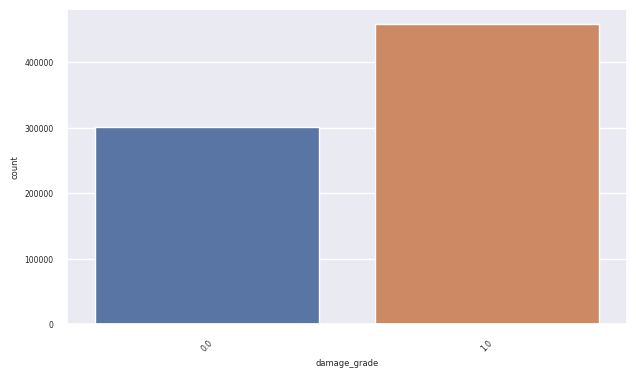

In [306]:
# Identify target (y)
target_col = 'damage_grade'

# Summarize target class balance
label_count = len(building_df)
label_props = (building_df.groupby(target_col, dropna = False)[target_col].count() / label_count * 100).sort_values(ascending = False)
print('Target class (label) proportions:'); print(label_props.to_string(header = False))


for field in ['damage_grade']:
  fig,ax = plt.subplots()
  sns.countplot(building_df[field])
  xticks = ax.get_yticklabels()
  ax.tick_params(axis = 'x', rotation = 45)

#Drop Small Number of Rows with Missing

In [307]:
# Drop (relatively immaterial number of) null labels
print('Starting rows:', len(building_df), end = ' ')

#building_df.dropna(axis = 0, subset = [target_col], inplace = True)
building_df.dropna(axis = 0, inplace = True)

print('Ending rows:', len(building_df))

target_classes = sorted(building_df[target_col].unique())

Starting rows: 758959 Ending rows: 758947


# Use this Area to Drop Specific Features

In [308]:
#################### Edited to allow easy selection of features

# Identify prospective feature columns by 'type'
num_cols = [
    'count_floors_pre_eq',
    'age_building',
    'plinth_area_sq_ft',
    'height_ft_pre_eq',
    'count_families',
    ]                       #6         
cat_cols = [
    'land_surface_condition',
    'foundation_type',
    'roof_type',
    'ground_floor_type',
    'other_floor_type',
    'position',
    #'plan_configuration',         # NEAR ZERO VAR
    #'legal_ownership_status',         # NEAR ZERO VAR
    'district_id'
    ]                           #9
bin_cols = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered',
    'has_superstructure_other',
    'has_secondary_use',
    #'has_secondary_use_agriculture',         # NEAR ZERO VAR
    #'has_secondary_use_hotel',         # NEAR ZERO VAR
    #'has_secondary_use_rental',         # NEAR ZERO VAR
    #'has_secondary_use_institution',         # NEAR ZERO VAR
    #'has_secondary_use_school',         # NEAR ZERO VAR
    #'has_secondary_use_industry',         # NEAR ZERO VAR
    #'has_secondary_use_health_post',         # NEAR ZERO VAR
    #'has_secondary_use_gov_office',         # NEAR ZERO VAR
    #'has_secondary_use_use_police',         # NEAR ZERO VAR
    #'has_secondary_use_other',          # NEAR ZERO VAR
    'has_geotechnical_risk',
    'has_geotechnical_risk_land_settlement',
    'has_geotechnical_risk_fault_crack',
    #'has_geotechnical_risk_liquefaction',         # NEAR ZERO VAR
    'has_geotechnical_risk_landslide',
    'has_geotechnical_risk_rock_fall',
    #'has_geotechnical_risk_flood',         # NEAR ZERO VAR
    #'has_geotechnical_risk_other'         # NEAR ZERO VAR
    ]                                   #30 (11, 11, 8 )

In [309]:
# Confirm [uniform] types
print(building_df.dtypes[num_cols].to_string())
print(building_df.dtypes[cat_cols].to_string())
print(building_df.dtypes[bin_cols].to_string())

count_floors_pre_eq      int64
age_building             int64
plinth_area_sq_ft        int64
height_ft_pre_eq         int64
count_families         float64
land_surface_condition    object
foundation_type           object
roof_type                 object
ground_floor_type         object
other_floor_type          object
position                  object
district_id                int64
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64
has_superstructure_rc_non_engineered        int64
has_superstructure_rc_engineered            int64
has_superstructure_other                    int64
has_secondary_use                         float64
has_geotechnic

# Merging only selected features (from lists above)

In [310]:
#################### New block that edits out columns with '#' in above block

building_df= pd.concat([building_df[num_cols], 
                        building_df[cat_cols],
                        building_df[bin_cols], 
                        building_df['damage_grade']], axis = 1)
building_df.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,count_families,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,damage_grade
0,1,9,288,9,1.00,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,0.00,0.00,0,0,0,0,0.00
1,1,15,364,9,1.00,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,0.00,0.00,0,0,0,0,1.00
2,1,20,384,9,1.00,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,0.00,0.00,0,0,0,0,0.00
3,1,20,312,9,1.00,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,0.00,0.00,0,0,0,0,0.00
4,1,30,308,9,1.00,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,0.00,0.00,0,0,0,0,0.00


In [311]:
################# No longer need to name columns

# Update types as needed (for consistency)

building_df[num_cols] = building_df[num_cols].astype(int)
building_df[bin_cols] = building_df[bin_cols].astype(int)
#building_df['has_secondary_use'] = building_df['has_secondary_use'].astype(int)
#building_df['has_geotechnical_risk'] = building_df['has_geotechnical_risk'].astype(int)

In [312]:
# Confirm [uniform] types
print(building_df.dtypes[num_cols].to_string())
print(building_df.dtypes[cat_cols].to_string())
print(building_df.dtypes[bin_cols].to_string())

count_floors_pre_eq    int64
age_building           int64
plinth_area_sq_ft      int64
height_ft_pre_eq       int64
count_families         int64
land_surface_condition    object
foundation_type           object
roof_type                 object
ground_floor_type         object
other_floor_type          object
position                  object
district_id                int64
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
has_secondary_use                         int64
has_geotechnical_risk                     int64


In [313]:
building_df['district_id'] = building_df['district_id'].astype('object')

In [314]:
# Confirm [uniform] types
print(building_df.dtypes[num_cols].to_string())
print(building_df.dtypes[cat_cols].to_string())
print(building_df.dtypes[bin_cols].to_string())

count_floors_pre_eq    int64
age_building           int64
plinth_area_sq_ft      int64
height_ft_pre_eq       int64
count_families         int64
land_surface_condition    object
foundation_type           object
roof_type                 object
ground_floor_type         object
other_floor_type          object
position                  object
district_id               object
has_superstructure_adobe_mud              int64
has_superstructure_mud_mortar_stone       int64
has_superstructure_stone_flag             int64
has_superstructure_cement_mortar_stone    int64
has_superstructure_mud_mortar_brick       int64
has_superstructure_cement_mortar_brick    int64
has_superstructure_timber                 int64
has_superstructure_bamboo                 int64
has_superstructure_rc_non_engineered      int64
has_superstructure_rc_engineered          int64
has_superstructure_other                  int64
has_secondary_use                         int64
has_geotechnical_risk                     int64


In [315]:
'''
# Update types as needed (for consistency)

building_df['count_families'] = building_df['count_families'].astype(int)
building_df['has_superstructure_other'] = building_df['has_superstructure_other'].astype(int)
building_df['has_secondary_use'] = building_df['has_secondary_use'].astype(int)
building_df['has_geotechnical_risk'] = building_df['has_geotechnical_risk'].astype(int)
'''

"\n# Update types as needed (for consistency)\n\nbuilding_df['count_families'] = building_df['count_families'].astype(int)\nbuilding_df['has_superstructure_other'] = building_df['has_superstructure_other'].astype(int)\nbuilding_df['has_secondary_use'] = building_df['has_secondary_use'].astype(int)\nbuilding_df['has_geotechnical_risk'] = building_df['has_geotechnical_risk'].astype(int)\n"

# Sample the full df to run model tests

In [316]:
building_df = building_df.sample(frac=.04, random_state=42)

#Remap the target before splitting

In [317]:
building_df.columns

Index(['count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'count_families', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'district_id', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'has_secondary_use', 'has_geotechnical_risk', 'has_geotechnical_risk_land_settlement', 'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_landslide', 'has_geotechnical_risk_rock_fall', 'damage_grade'], dtype='object')

In [318]:


# Segregate data into predictor (X) and target (y) dataframes
building_X = building_df.loc[:, building_df.columns != 'damage_grade'].copy()
building_y = building_df['damage_grade']

# Partition data 70/30, stratifying for class balance (ref. above)
X_train, X_test, y_train, y_test = train_test_split(
    building_X, building_y, test_size = 0.3, random_state = 42, stratify = building_y
)

In [319]:
building_y.head()

77543    0.00
46583    0.00
442676   1.00
326571   0.00
457269   1.00
Name: damage_grade, dtype: float64

In [320]:
na_df = pd.DataFrame(X_train[num_cols + cat_cols + bin_cols].isna().sum()) / len(X_train) * 100
na_df.index.name = 'column'; na_df.reset_index(inplace = True)
print('Proportion of nulls:'); print(na_df[na_df[0] > 0].to_string(index = False, header = False))

Proportion of nulls:
Empty DataFrame
Columns: [column, 0]
Index: []


In [321]:
# Address missing/null values here? Or, pipeline? For both train, test. . .

############## Eliminated
'''
X_train['damage_overall_collapse'].fillna('[missing]', inplace = True)
X_test['damage_overall_collapse'].fillna('[missing]', inplace = True)

X_train['damage_overall_leaning'].fillna('[missing]', inplace = True)
X_test['damage_overall_leaning'].fillna('[missing]', inplace = True)
'''

"\nX_train['damage_overall_collapse'].fillna('[missing]', inplace = True)\nX_test['damage_overall_collapse'].fillna('[missing]', inplace = True)\n\nX_train['damage_overall_leaning'].fillna('[missing]', inplace = True)\nX_test['damage_overall_leaning'].fillna('[missing]', inplace = True)\n"

In [322]:
cat_count = len(X_train)
for cc in cat_cols:
    print()
    print(cc, '-')
    for cv in pd.unique(X_train[cc]):
        if isinstance(cv, float) != True:
            print(cv, '(%.2f)' % (X_train[X_train[cc] == cv][cc].count() / cat_count * 100))


land_surface_condition -
Flat (83.12)
Moderate slope (13.72)
Steep slope (3.16)

foundation_type -
Mud mortar-Stone/Brick (82.38)
Bamboo/Timber (7.62)
Cement-Stone/Brick (5.18)
Other (0.67)
RC (4.14)

roof_type -
Bamboo/Timber-Heavy roof (28.56)
Bamboo/Timber-Light roof (65.76)
RCC/RB/RBC (5.68)

ground_floor_type -
Mud (80.84)
Brick/Stone (8.92)
RC (9.62)
Timber (0.48)
Other (0.14)

other_floor_type -
TImber/Bamboo-Mud (64.23)
Not applicable (15.36)
Timber-Planck (16.16)
RCC/RB/RBC (4.25)

position -
Attached-1 side (17.20)
Not attached (79.16)
Attached-2 side (3.46)
Attached-3 side (0.17)

district_id -
22 (7.64)
30 (11.78)
31 (11.74)
36 (10.41)
21 (7.91)
24 (12.74)
23 (11.40)
28 (10.35)
12 (5.22)
20 (9.06)
29 (1.75)


In [323]:
# Encode categorical label (y)
label_enc = LabelEncoder().fit(y_train)
y_train = label_enc.transform(y_train)
y_test = label_enc.transform(y_test)

# Encode other here? Or, pipeline (currently handled in pipeline)?

In [324]:
print('Skewness:'); print(pd.DataFrame(building_X[num_cols].skew()).to_string(header = False))

Skewness:
count_floors_pre_eq 0.36
age_building        2.24
plinth_area_sq_ft   4.01
height_ft_pre_eq    2.43
count_families      1.52


In [325]:
# Address outliers here?

In [326]:
# Address centering/scaling here? Or, pipeline (currently handled in pipeline)?

In [327]:
print(building_X[bin_cols].max() - building_X[bin_cols].min())

has_superstructure_adobe_mud              1
has_superstructure_mud_mortar_stone       1
has_superstructure_stone_flag             1
has_superstructure_cement_mortar_stone    1
has_superstructure_mud_mortar_brick       1
has_superstructure_cement_mortar_brick    1
has_superstructure_timber                 1
has_superstructure_bamboo                 1
has_superstructure_rc_non_engineered      1
has_superstructure_rc_engineered          1
has_superstructure_other                  1
has_secondary_use                         1
has_geotechnical_risk                     1
has_geotechnical_risk_land_settlement     1
has_geotechnical_risk_fault_crack         1
has_geotechnical_risk_landslide           1
has_geotechnical_risk_rock_fall           1
dtype: int64


In [328]:
#
corr_df = X_train[num_cols].corr()
corr_df.rename(columns = lambda s: s[0:19], index = lambda s: s[0:19], inplace = True)
print(corr_df)

#
# Do something like Cramer's V for categorical correlation?

                     count_floors_pre_eq  age_building  plinth_area_sq_ft  height_ft_pre_eq  count_families
count_floors_pre_eq         1.00              0.18            0.11               0.71             0.08     
age_building                0.18              1.00           -0.05               0.11             0.03     
plinth_area_sq_ft           0.11             -0.05            1.00               0.20             0.10     
height_ft_pre_eq            0.71              0.11            0.20               1.00             0.06     
count_families              0.08              0.03            0.10               0.06             1.00     


In [329]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
# Standardized modeling function, to create and execute a modeling pipeline through
#   to model performance metrics
def model(algorithm, 
          iteration, 
          params, 
          classes, 
          X_tr, y_tr, X_te, y_te, 
          cv, 
          plot_cm,
          plot_auc):
    # Create transformers
    cat_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    standardizer = StandardScaler()
    
    # Create preprocessor
    cat_transformer = make_pipeline(cat_encoder)
    num_transformer = make_pipeline(standardizer)
    preprocessor = ColumnTransformer(
        [('cat', cat_transformer, cat_cols),
         ('num', num_transformer, num_cols)]
    )

    # Prepare algorithm with hyperparameters+
    algorithm.set_params(**params)
    algorithm_name = type(algorithm).__name__ + ' (iteration ' + str(iteration) + ')'
    
    # Create pipeline and cross-validate model (for later output)
    pipe = make_pipeline(preprocessor, algorithm)
    
    # Fit model
    print('\n\n', 'Fitting ' + algorithm_name + '...', end = ' ')
    fit_start = time()
    pipe.fit(X_tr, y_tr)
    fit_time = time() - fit_start
    print('done in %0.3fs.' % fit_time)
    
    # Cross-validate model
    scores = []
    cv_time = 0
    if (cv > 0):
        print('Cross-validating ' + algorithm_name + '...', end = ' ')
        cv_start = time()
        scores = cross_val_score(pipe, X_tr, y_tr, cv = cv, scoring = 'accuracy')
        cv_time = time() - cv_start
        print('done in %0.3fs.' % cv_time)
        print(scores)
    
    # Validate model
    print('Validating ' + algorithm_name + '...', end = ' ')
    val_start = time()
    y_tr_pred = pipe.predict(X_tr)
    y_te_pred = pipe.predict(X_te)
    val_time = time() - val_start
    print('done in %0.2fs.' % val_time)

    # Show validation results
    if plot_cm:
        # USED ConfusionMatrixDisplay.from_predictions for better color palette and plot control
        #fig, ax = plt.subplots()
        #cmd = ConfusionMatrixDisplay(confusion_matrix(y_te, y_te_pred), 
        #                             display_labels = classes)
        #cmd.plot(ax = ax)
        ConfusionMatrixDisplay.from_predictions(y_te, y_te_pred,
                                                cmap = 'Purples')
        plt.suptitle(algorithm_name, y = 1)
        plt.title(params)
        plt.show()

    print('\n', algorithm_name)
    print(params)
    print(classification_report(y_te, y_te_pred))

    # calculate AUC and persist, Show ROC AUC results
    if plot_auc:
      fpr, tpr, threshold = roc_curve(y_te, y_te_pred)
      roc_auc = auc(fpr, tpr)

      figure(figsize = [3,2])
      plt.title('Receiver Operating Characteristic')
      plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

      plt.legend(loc = 'lower right')
      plt.plot([0, 1], [0, 1],'r--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.ylabel('True Positive Rate')
      plt.xlabel('False Positive Rate')
      plt.show()
    
    # Persist pipeline (+model)
    pipe_filename = algorithm_name + '.pipe'
    joblib.dump(pipe, pipe_filename)
    
    # Persist results
    results = []
    results.append ({
        'algorithm': algorithm_name,
        'parameters': params,
        'fit_time': fit_time,
        'cv_time': cv_time,
        'val_time': val_time,
        'scores': tuple(scores),
        'train_acc': accuracy_score(y_tr_pred, y_tr),
        'test_acc': accuracy_score(y_te_pred, y_te),
        'roc_auc': roc_auc
    })
    results_filename = algorithm_name + '.results'
    joblib.dump(results, results_filename)

    return pd.DataFrame(results)

In [330]:
#from sklearn.preprocessing import label_binarize
#label_binarize([1,6], classes=[1, 2, 4, 6])
#                                                 [out] array([[1, 0, 0, 0],
#                                                 [0, 0, 0, 1]])
#n_classes = y.shape[1]



 Fitting DecisionTreeClassifier (iteration 1)... done in 0.193s.
Cross-validating DecisionTreeClassifier (iteration 1)... done in 0.506s.
[0.75 0.74 0.74]
Validating DecisionTreeClassifier (iteration 1)... done in 0.13s.


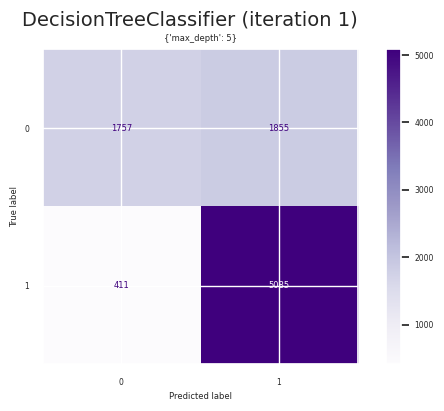


 DecisionTreeClassifier (iteration 1)
{'max_depth': 5}
              precision    recall  f1-score   support

           0       0.81      0.49      0.61      3612
           1       0.73      0.93      0.82      5496

    accuracy                           0.75      9108
   macro avg       0.77      0.71      0.71      9108
weighted avg       0.76      0.75      0.73      9108



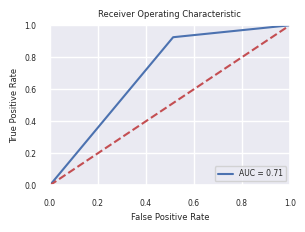



 Fitting DecisionTreeClassifier (iteration 2)... done in 0.175s.
Cross-validating DecisionTreeClassifier (iteration 2)... done in 0.440s.
[0.75 0.75 0.74]
Validating DecisionTreeClassifier (iteration 2)... done in 0.08s.


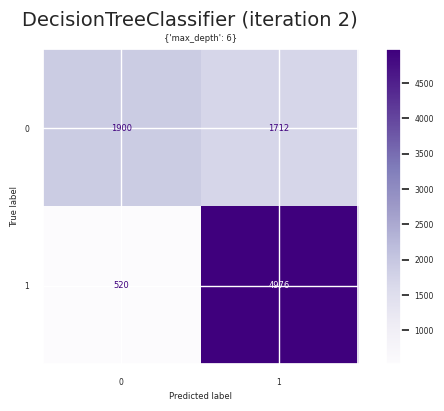


 DecisionTreeClassifier (iteration 2)
{'max_depth': 6}
              precision    recall  f1-score   support

           0       0.79      0.53      0.63      3612
           1       0.74      0.91      0.82      5496

    accuracy                           0.75      9108
   macro avg       0.76      0.72      0.72      9108
weighted avg       0.76      0.75      0.74      9108



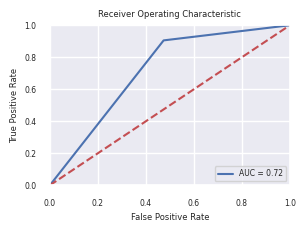



 Fitting DecisionTreeClassifier (iteration 3)... done in 0.136s.
Cross-validating DecisionTreeClassifier (iteration 3)... done in 0.340s.
[0.74 0.75 0.74]
Validating DecisionTreeClassifier (iteration 3)... done in 0.10s.


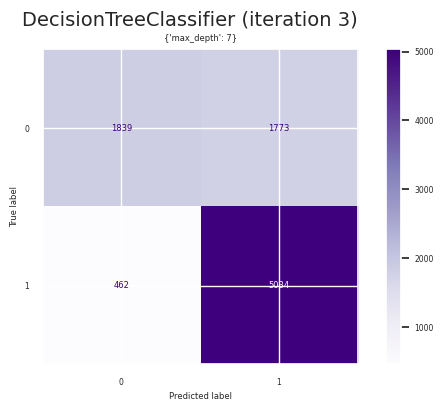


 DecisionTreeClassifier (iteration 3)
{'max_depth': 7}
              precision    recall  f1-score   support

           0       0.80      0.51      0.62      3612
           1       0.74      0.92      0.82      5496

    accuracy                           0.75      9108
   macro avg       0.77      0.71      0.72      9108
weighted avg       0.76      0.75      0.74      9108



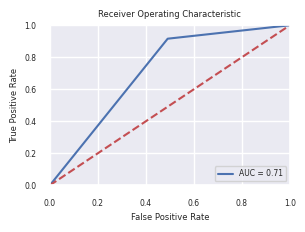



 Fitting DecisionTreeClassifier (iteration 4)... done in 0.129s.
Cross-validating DecisionTreeClassifier (iteration 4)... done in 0.480s.
[0.75 0.74 0.74]
Validating DecisionTreeClassifier (iteration 4)... done in 0.07s.


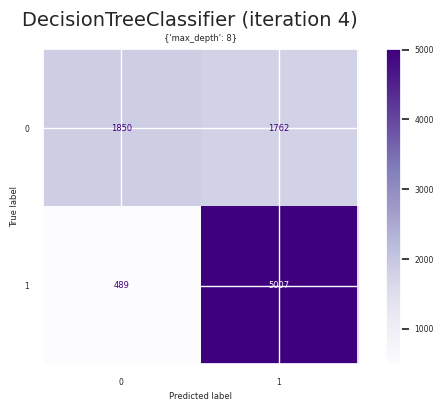


 DecisionTreeClassifier (iteration 4)
{'max_depth': 8}
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      3612
           1       0.74      0.91      0.82      5496

    accuracy                           0.75      9108
   macro avg       0.77      0.71      0.72      9108
weighted avg       0.76      0.75      0.74      9108



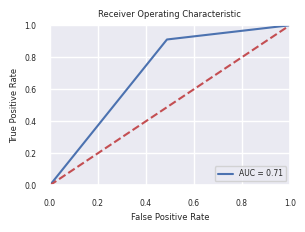



 Fitting DecisionTreeClassifier (iteration 5)... done in 0.133s.
Cross-validating DecisionTreeClassifier (iteration 5)... done in 0.368s.
[0.75 0.74 0.74]
Validating DecisionTreeClassifier (iteration 5)... done in 0.08s.


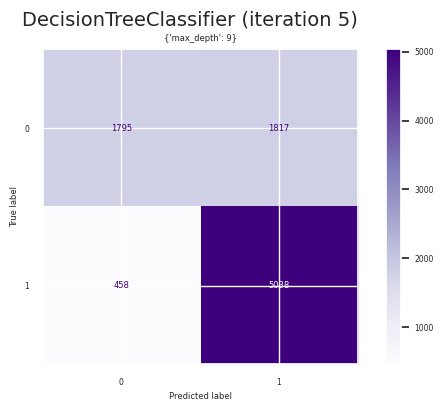


 DecisionTreeClassifier (iteration 5)
{'max_depth': 9}
              precision    recall  f1-score   support

           0       0.80      0.50      0.61      3612
           1       0.73      0.92      0.82      5496

    accuracy                           0.75      9108
   macro avg       0.77      0.71      0.71      9108
weighted avg       0.76      0.75      0.74      9108



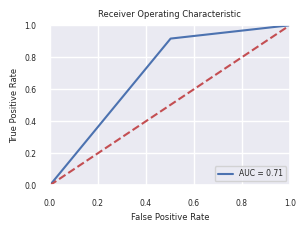



 Fitting DecisionTreeClassifier (iteration 6)... done in 0.139s.
Cross-validating DecisionTreeClassifier (iteration 6)... done in 0.367s.
[0.75 0.74 0.74]
Validating DecisionTreeClassifier (iteration 6)... done in 0.08s.


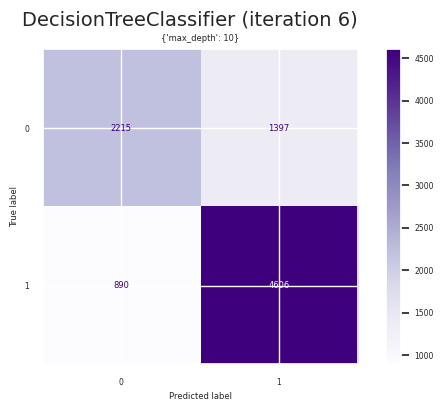


 DecisionTreeClassifier (iteration 6)
{'max_depth': 10}
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      3612
           1       0.77      0.84      0.80      5496

    accuracy                           0.75      9108
   macro avg       0.74      0.73      0.73      9108
weighted avg       0.75      0.75      0.74      9108



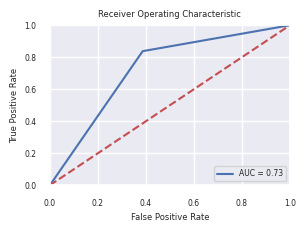



 Fitting Perceptron (iteration 1)... done in 0.106s.
Cross-validating Perceptron (iteration 1)... done in 0.389s.
[0.7  0.58 0.7 ]
Validating Perceptron (iteration 1)... done in 0.12s.


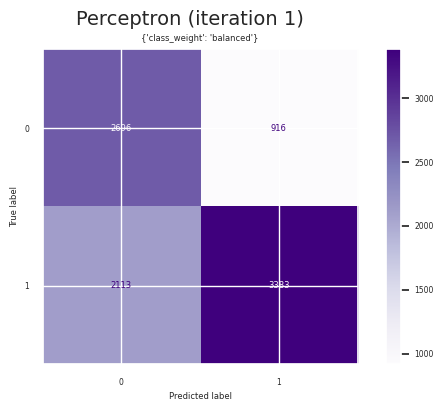


 Perceptron (iteration 1)
{'class_weight': 'balanced'}
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      3612
           1       0.79      0.62      0.69      5496

    accuracy                           0.67      9108
   macro avg       0.67      0.68      0.67      9108
weighted avg       0.70      0.67      0.67      9108



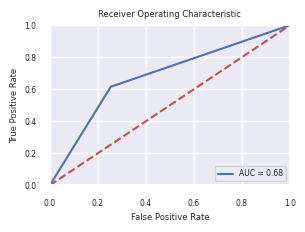



 Fitting LogisticRegression (iteration 1)... done in 1.789s.
Cross-validating LogisticRegression (iteration 1)... done in 5.460s.
[0.75 0.75 0.75]
Validating LogisticRegression (iteration 1)... done in 0.11s.


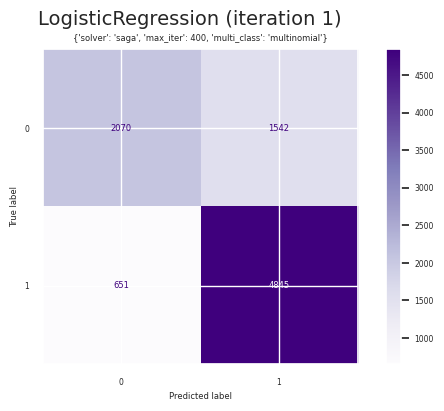


 LogisticRegression (iteration 1)
{'solver': 'saga', 'max_iter': 400, 'multi_class': 'multinomial'}
              precision    recall  f1-score   support

           0       0.76      0.57      0.65      3612
           1       0.76      0.88      0.82      5496

    accuracy                           0.76      9108
   macro avg       0.76      0.73      0.73      9108
weighted avg       0.76      0.76      0.75      9108



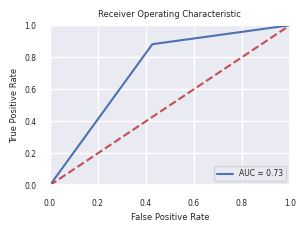



 Fitting LinearSVC (iteration 1)... done in 1.258s.
Cross-validating LinearSVC (iteration 1)... done in 3.118s.
[0.75 0.75 0.75]
Validating LinearSVC (iteration 1)... done in 0.12s.


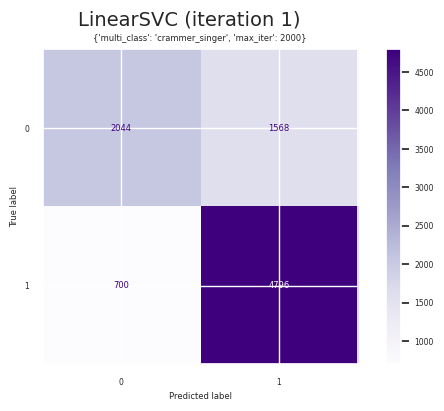


 LinearSVC (iteration 1)
{'multi_class': 'crammer_singer', 'max_iter': 2000}
              precision    recall  f1-score   support

           0       0.74      0.57      0.64      3612
           1       0.75      0.87      0.81      5496

    accuracy                           0.75      9108
   macro avg       0.75      0.72      0.73      9108
weighted avg       0.75      0.75      0.74      9108



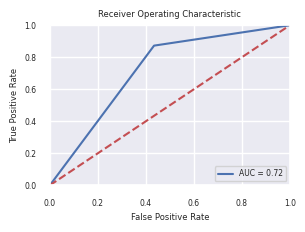

,algorithm,parameters,fit_time,cv_time,val_time,scores,train_acc,test_acc,roc_auc
0,DecisionTreeClassifier (iteration 1),{'max_depth': 5},0.19,0.51,0.13,"(0.7483060417843026, 0.7416349004659043, 0.742...",0.75,0.75,0.71
0,DecisionTreeClassifier (iteration 2),{'max_depth': 6},0.17,0.44,0.08,"(0.7471767363071711, 0.7453056614428915, 0.743...",0.75,0.75,0.72
0,DecisionTreeClassifier (iteration 3),{'max_depth': 7},0.14,0.34,0.10,"(0.7446357989836251, 0.7469998588168855, 0.742...",0.76,0.75,0.71
0,DecisionTreeClassifier (iteration 4),{'max_depth': 8},0.13,0.48,0.07,"(0.7480237154150198, 0.7444585627558944, 0.738...",0.76,0.75,0.71
0,DecisionTreeClassifier (iteration 5),{'max_depth': 9},0.13,0.37,0.08,"(0.7456239412761152, 0.7381053226034167, 0.739...",0.76,0.75,0.71
0,DecisionTreeClassifier (iteration 6),{'max_depth': 10},0.14,0.37,0.08,"(0.7452004517221908, 0.7397995199774107, 0.737...",0.77,0.75,0.73
0,Perceptron (iteration 1),{'class_weight': 'balanced'},0.11,0.39,0.12,"(0.7035573122529645, 0.578850769447974, 0.6982...",0.66,0.67,0.68
0,LogisticRegression (iteration 1),"{'solver': 'saga', 'max_iter': 400, 'multi_cla...",1.79,5.46,0.11,"(0.7529644268774703, 0.7536354651983623, 0.751...",0.75,0.76,0.73
0,LinearSVC (iteration 1),"{'multi_class': 'crammer_singer', 'max_iter': ...",1.26,3.12,0.12,"(0.7485883681535855, 0.7481293237328815, 0.745...",0.75,0.75,0.72


In [331]:
# Iterate on models (preliminary)
clf_results = pd.DataFrame()

############### Function Structure

#def model(algorithm, 
#          iteration, 
#          params, 
#          classes, 
#          X_tr, y_tr, X_te, y_te, 
#          cv, 
#          plot_cm)


for depth in range(5, 11):
    tree_r = model(DecisionTreeClassifier(),
                   (depth - 4),
                   {'max_depth': depth},
                   target_classes,
                   X_train, y_train, X_test, y_test,
                   cv = 3, 
                   plot_cm = True,
                   plot_auc = True)
    clf_results = pd.concat([clf_results, tree_r])

#
perc_r = model(Perceptron(), 
               1,
               {'class_weight': 'balanced'},
               target_classes, 
               X_train, y_train, X_test, y_test,
               cv = 3, 
               plot_cm = True,
               plot_auc = True)
clf_results = pd.concat([clf_results, perc_r])

#for i in range(1, 3):
#    knn_r = model(KNeighborsClassifier(),
#                  i,
#                  {'n_neighbors': 2 * i + 1},
#                  target_classes, 
#                  X_train, y_train, X_test, y_test,
#                  cv = 3, 
#                  plot_cm = False)
#    clf_results = pd.concat([clf_results, knn_r])

logr_r = model(LogisticRegression(), 
               1,
               {'solver': 'saga', 'max_iter': 400, 'multi_class': 'multinomial'},
               target_classes, 
               X_train, y_train, X_test, y_test,
               cv = 3,
               plot_cm = True,
               plot_auc = True)
clf_results = pd.concat([clf_results, logr_r])

svm_r = model(LinearSVC(), 
              1,
              {'multi_class': 'crammer_singer', 'max_iter': 2000},
              target_classes, 
              X_train, y_train, X_test, y_test,
              cv = 3, 
              plot_cm = True,
              plot_auc = True)
clf_results = pd.concat([clf_results, svm_r])

clf_results



 Fitting MLPClassifier (iteration 1)... 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


done in 54.876s.
Cross-validating MLPClassifier (iteration 1)... 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


done in 111.562s.
[0.74 0.74 0.74]
Validating MLPClassifier (iteration 1)... done in 0.19s.


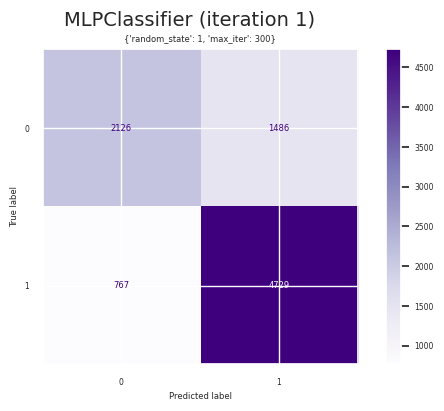


 MLPClassifier (iteration 1)
{'random_state': 1, 'max_iter': 300}
              precision    recall  f1-score   support

           0       0.73      0.59      0.65      3612
           1       0.76      0.86      0.81      5496

    accuracy                           0.75      9108
   macro avg       0.75      0.72      0.73      9108
weighted avg       0.75      0.75      0.75      9108



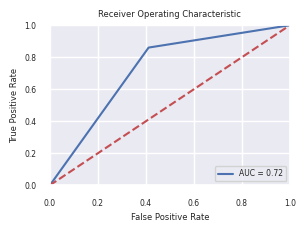



 Fitting RandomForestClassifier (iteration 1)... done in 0.859s.
Cross-validating RandomForestClassifier (iteration 1)... done in 1.703s.
[0.72 0.72 0.72]
Validating RandomForestClassifier (iteration 1)... done in 0.27s.


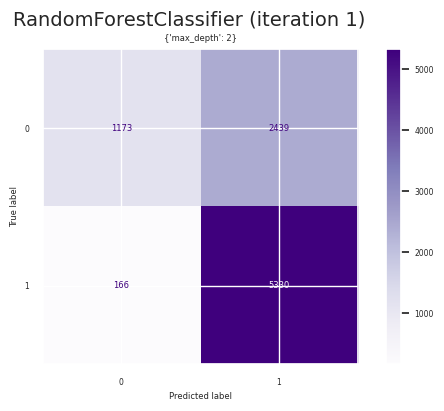


 RandomForestClassifier (iteration 1)
{'max_depth': 2}
              precision    recall  f1-score   support

           0       0.88      0.32      0.47      3612
           1       0.69      0.97      0.80      5496

    accuracy                           0.71      9108
   macro avg       0.78      0.65      0.64      9108
weighted avg       0.76      0.71      0.67      9108



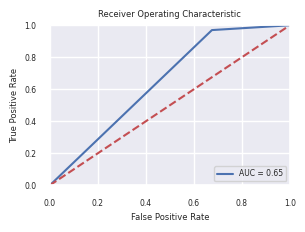



 Fitting RidgeClassifier (iteration 1)... done in 0.086s.
Cross-validating RidgeClassifier (iteration 1)... done in 0.415s.
[0.75 0.75 0.75]
Validating RidgeClassifier (iteration 1)... done in 0.11s.


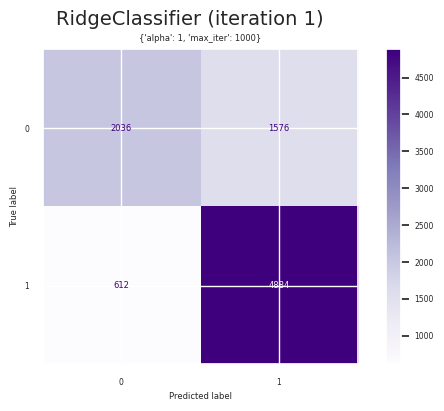


 RidgeClassifier (iteration 1)
{'alpha': 1, 'max_iter': 1000}
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      3612
           1       0.76      0.89      0.82      5496

    accuracy                           0.76      9108
   macro avg       0.76      0.73      0.73      9108
weighted avg       0.76      0.76      0.75      9108



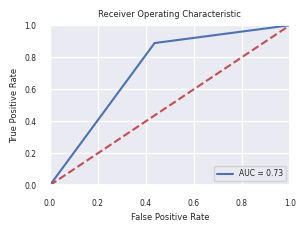

,algorithm,parameters,fit_time,cv_time,val_time,scores,train_acc,test_acc,roc_auc
0,MLPClassifier (iteration 1),"{'random_state': 1, 'max_iter': 300}",54.88,111.56,0.19,"(0.739553924336533, 0.7406466186644077, 0.7444...",0.80,0.75,0.72
0,RandomForestClassifier (iteration 1),{'max_depth': 2},0.86,1.70,0.27,"(0.721485036702428, 0.7196103346039814, 0.7222...",0.71,0.71,0.65
0,RidgeClassifier (iteration 1),"{'alpha': 1, 'max_iter': 1000}",0.09,0.41,0.11,"(0.7529644268774703, 0.7537766483128617, 0.751...",0.75,0.76,0.73


In [332]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

# Iterate on models (preliminary)
clf_results2 = pd.DataFrame()

############### Function Structure

nn_r = model(MLPClassifier(),
             1,
             {'random_state' : 1, 'max_iter': 300},
             target_classes,
             X_train, y_train, X_test, y_test,
             cv = 3,
             plot_cm = True,
             plot_auc = True)
clf_results2 = pd.concat([clf_results2, nn_r])

rf_r = model(RandomForestClassifier(),
             1,
             {'max_depth' : 2},
             target_classes,
             X_train, y_train, X_test, y_test,
             cv = 3,
             plot_cm = True,
             plot_auc = True)
clf_results2 = pd.concat([clf_results2, rf_r])

ridge_r = model(RidgeClassifier(),
             1,
             {'alpha' : 1, 'max_iter': 1000},
             target_classes,
             X_train, y_train, X_test, y_test,
             cv = 3,
             plot_cm = True,
             plot_auc = True)
clf_results2 = pd.concat([clf_results2, ridge_r])

clf_results2

# Summer's kNN Minkowski
## Still need to add a for loop for k

In [333]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB



 Fitting KNeighborsClassifier (iteration 1)... done in 0.070s.
Cross-validating KNeighborsClassifier (iteration 1)... done in 8.037s.
[0.73 0.73 0.74]
Validating KNeighborsClassifier (iteration 1)... done in 15.78s.


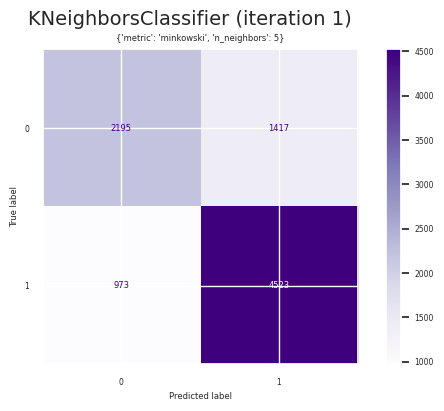


 KNeighborsClassifier (iteration 1)
{'metric': 'minkowski', 'n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      3612
           1       0.76      0.82      0.79      5496

    accuracy                           0.74      9108
   macro avg       0.73      0.72      0.72      9108
weighted avg       0.73      0.74      0.73      9108



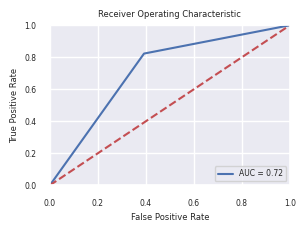

,algorithm,parameters,fit_time,cv_time,val_time,scores,train_acc,test_acc,roc_auc
0,KNeighborsClassifier (iteration 1),"{'metric': 'minkowski', 'n_neighbors': 5}",0.07,8.04,15.78,"(0.7278373800112931, 0.7268106734434562, 0.735...",0.81,0.74,0.72


In [334]:
clf_results3 = pd.DataFrame()

knnmink_r = model(KNeighborsClassifier(),
              1,
              {'metric' : 'minkowski', 'n_neighbors' : 5},
              target_classes,
              X_train, y_train, X_test, y_test,
              cv = 3,
              plot_cm = True,
              plot_auc = True)
clf_results3 = pd.concat([clf_results3, knnmink_r])

clf_results3

In [335]:
############# Summer's previous kNN
'''
# creating a function to create and test a KNN model and output accuracy scores 
def k_nn(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues: 
    clf = KNeighborsClassifier(metric = metric, n_neighbors = i).fit(X_train, y_train)
    clf_train_pred = clf.predict(X_train)
    clf_test_pred = clf.predict(X_test)
    clfs.append(clf)
    knn_accuracy.append({'k-values':i, 'Training Accuracy': accuracy_score(clf_train_pred, y_train), 
                         'Test Accuracy': accuracy_score(clf_test_pred, y_test) })
    print('K-value', i, 'complete')
  return pd.DataFrame(knn_accuracy), clfs
  '''

"\n# creating a function to create and test a KNN model and output accuracy scores \ndef k_nn(xtrain, ytrain, xtest, ytest, kvalues, metric):\n  knn_accuracy = []\n  clfs = []\n  for i in kvalues: \n    clf = KNeighborsClassifier(metric = metric, n_neighbors = i).fit(X_train, y_train)\n    clf_train_pred = clf.predict(X_train)\n    clf_test_pred = clf.predict(X_test)\n    clfs.append(clf)\n    knn_accuracy.append({'k-values':i, 'Training Accuracy': accuracy_score(clf_train_pred, y_train), \n                         'Test Accuracy': accuracy_score(clf_test_pred, y_test) })\n    print('K-value', i, 'complete')\n  return pd.DataFrame(knn_accuracy), clfs\n  "

# Summer's kNN Manhattan
## Still need to add a for loop for k



 Fitting KNeighborsClassifier (iteration 1)... done in 0.065s.
Cross-validating KNeighborsClassifier (iteration 1)... done in 12.765s.
[0.73 0.73 0.74]
Validating KNeighborsClassifier (iteration 1)... done in 30.01s.


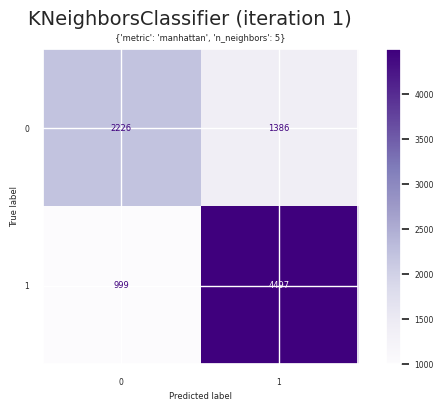


 KNeighborsClassifier (iteration 1)
{'metric': 'manhattan', 'n_neighbors': 5}
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      3612
           1       0.76      0.82      0.79      5496

    accuracy                           0.74      9108
   macro avg       0.73      0.72      0.72      9108
weighted avg       0.73      0.74      0.74      9108



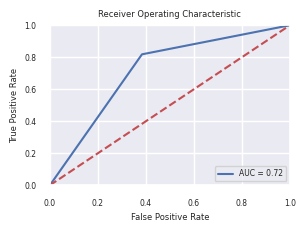

,algorithm,parameters,fit_time,cv_time,val_time,scores,train_acc,test_acc,roc_auc
0,KNeighborsClassifier (iteration 1),"{'metric': 'minkowski', 'n_neighbors': 5}",0.07,8.04,15.78,"(0.7278373800112931, 0.7268106734434562, 0.735...",0.81,0.74,0.72
0,KNeighborsClassifier (iteration 1),"{'metric': 'manhattan', 'n_neighbors': 5}",0.07,12.77,30.01,"(0.730660643704122, 0.7313285331074404, 0.7375...",0.82,0.74,0.72


In [336]:
knnman_r = model(KNeighborsClassifier(),
              1,
              {'metric' : 'manhattan', 'n_neighbors' : 5},
              target_classes,
              X_train, y_train, X_test, y_test,
              cv = 3,
              plot_cm = True,
              plot_auc = True)
clf_results3 = pd.concat([clf_results3, knnman_r])

clf_results3

# Summer's NB Bernoulli



 Fitting BernoulliNB (iteration 1)... done in 0.077s.
Cross-validating BernoulliNB (iteration 1)... done in 0.378s.
[0.73 0.73 0.73]
Validating BernoulliNB (iteration 1)... done in 0.15s.


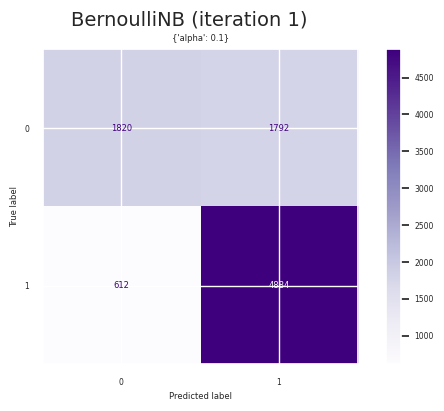


 BernoulliNB (iteration 1)
{'alpha': 0.1}
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3612
           1       0.73      0.89      0.80      5496

    accuracy                           0.74      9108
   macro avg       0.74      0.70      0.70      9108
weighted avg       0.74      0.74      0.72      9108



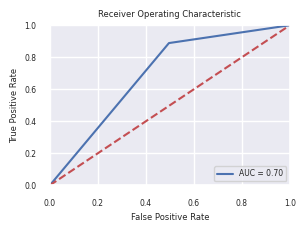



 Fitting BernoulliNB (iteration 1)... done in 0.074s.
Cross-validating BernoulliNB (iteration 1)... done in 0.391s.
[0.73 0.73 0.73]
Validating BernoulliNB (iteration 1)... done in 0.14s.


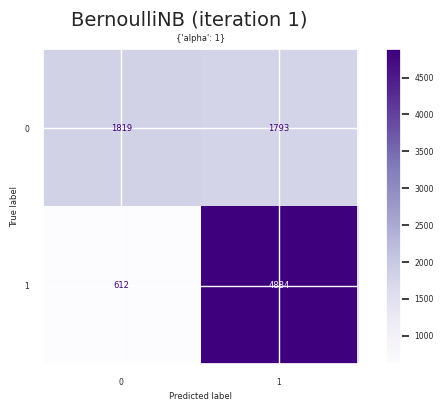


 BernoulliNB (iteration 1)
{'alpha': 1}
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3612
           1       0.73      0.89      0.80      5496

    accuracy                           0.74      9108
   macro avg       0.74      0.70      0.70      9108
weighted avg       0.74      0.74      0.72      9108



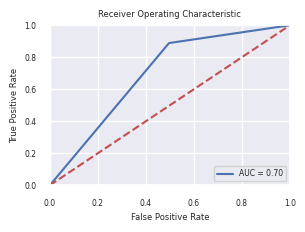



 Fitting BernoulliNB (iteration 1)... done in 0.068s.
Cross-validating BernoulliNB (iteration 1)... done in 0.387s.
[0.73 0.73 0.73]
Validating BernoulliNB (iteration 1)... done in 0.14s.


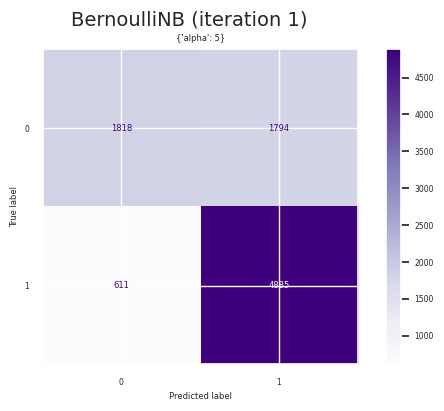


 BernoulliNB (iteration 1)
{'alpha': 5}
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3612
           1       0.73      0.89      0.80      5496

    accuracy                           0.74      9108
   macro avg       0.74      0.70      0.70      9108
weighted avg       0.74      0.74      0.72      9108



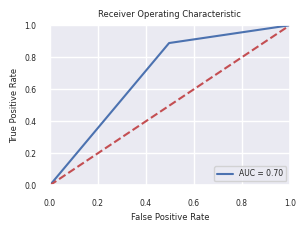



 Fitting BernoulliNB (iteration 1)... done in 0.073s.
Cross-validating BernoulliNB (iteration 1)... done in 0.538s.
[0.73 0.73 0.73]
Validating BernoulliNB (iteration 1)... done in 0.14s.


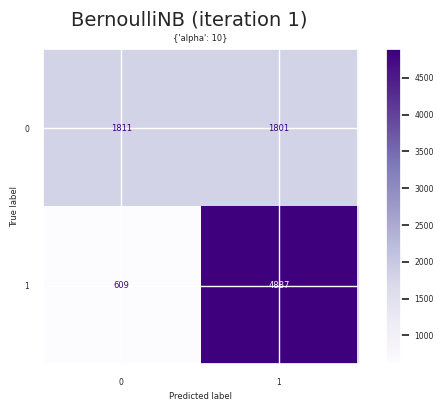


 BernoulliNB (iteration 1)
{'alpha': 10}
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      3612
           1       0.73      0.89      0.80      5496

    accuracy                           0.74      9108
   macro avg       0.74      0.70      0.70      9108
weighted avg       0.74      0.74      0.72      9108



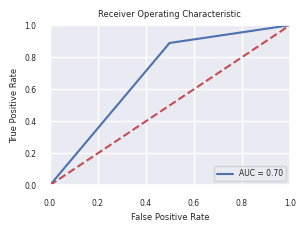

,algorithm,parameters,fit_time,cv_time,val_time,scores,train_acc,test_acc,roc_auc
0,KNeighborsClassifier (iteration 1),"{'metric': 'minkowski', 'n_neighbors': 5}",0.07,8.04,15.78,"(0.7278373800112931, 0.7268106734434562, 0.735...",0.81,0.74,0.72
0,KNeighborsClassifier (iteration 1),"{'metric': 'manhattan', 'n_neighbors': 5}",0.07,12.77,30.01,"(0.730660643704122, 0.7313285331074404, 0.7375...",0.82,0.74,0.72
0,BernoulliNB (iteration 1),{'alpha': 0.1},0.08,0.38,0.15,"(0.7317899491812535, 0.7259635747564591, 0.733...",0.73,0.74,0.70
0,BernoulliNB (iteration 1),{'alpha': 1},0.07,0.39,0.14,"(0.7317899491812535, 0.7259635747564591, 0.734...",0.73,0.74,0.70
0,BernoulliNB (iteration 1),{'alpha': 5},0.07,0.39,0.14,"(0.7309429700734048, 0.7259635747564591, 0.734...",0.73,0.74,0.70
0,BernoulliNB (iteration 1),{'alpha': 10},0.07,0.54,0.14,"(0.7316487859966121, 0.7263871240999576, 0.734...",0.73,0.74,0.70


In [337]:
alpha = [0.1,1,5,10]
for a in alpha:
  nbbern_r = model(BernoulliNB(),
                   1,
                   {'alpha' : a},
                   target_classes,
                   X_train, y_train, X_test, y_test,
                   cv = 3,
                   plot_cm = True,
                   plot_auc = True)
  clf_results3 = pd.concat([clf_results3, nbbern_r])

clf_results3

In [338]:
############# Summer's previous NB_bern
'''
# Bernoulli 
# creating a function to create and test a Naive Bayes model and output accuracy scores 
def nb_bern(xtrain, ytrain, xtest, ytest, alpha):
  nb_bern_acc = []
  clfs_bern = []
  for a in alpha: 
    clf = BernoulliNB(alpha = a).fit(X_train, y_train)
    clf_train_pred = clf.predict(X_train)
    clf_test_pred = clf.predict(X_test)
    clfs_bern.append(clf)
    nb_bern_acc.append({'alpha':a, 'Training Accuracy': accuracy_score(clf_train_pred, y_train), 
                         'Test Accuracy': accuracy_score(clf_test_pred, y_test) })
    print('alpha', a, 'complete')
  return pd.DataFrame(nb_bern_acc), clfs_bern
'''


"\n# Bernoulli \n# creating a function to create and test a Naive Bayes model and output accuracy scores \ndef nb_bern(xtrain, ytrain, xtest, ytest, alpha):\n  nb_bern_acc = []\n  clfs_bern = []\n  for a in alpha: \n    clf = BernoulliNB(alpha = a).fit(X_train, y_train)\n    clf_train_pred = clf.predict(X_train)\n    clf_test_pred = clf.predict(X_test)\n    clfs_bern.append(clf)\n    nb_bern_acc.append({'alpha':a, 'Training Accuracy': accuracy_score(clf_train_pred, y_train), \n                         'Test Accuracy': accuracy_score(clf_test_pred, y_test) })\n    print('alpha', a, 'complete')\n  return pd.DataFrame(nb_bern_acc), clfs_bern\n"

In [339]:
############# Summer's previous NB_bern
'''
nb_bern_acc, nb_bern_clf = nb_bern(X_train, y_train, X_test, y_test, (np.arange(0,10,.5)))
display(nb_bern_acc)
'''


'\nnb_bern_acc, nb_bern_clf = nb_bern(X_train, y_train, X_test, y_test, (np.arange(0,10,.5)))\ndisplay(nb_bern_acc)\n'